<a href="https://colab.research.google.com/github/dineshnaiduavula/MOUnderUncertainity_AssignmentCW2/blob/main/cw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 176ms/step - accuracy: 0.7200 - loss: 0.6109 - val_accuracy: 0.7063 - val_loss: 0.6143
Epoch 2/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 166ms/step - accuracy: 0.7293 - loss: 0.5979 - val_accuracy: 0.7063 - val_loss: 0.6061
Epoch 3/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 162ms/step - accuracy: 0.7106 - loss: 0.6041 - val_accuracy: 0.7063 - val_loss: 0.6083
Epoch 4/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 160ms/step - accuracy: 0.7066 - loss: 0.6073 - val_accuracy: 0.7063 - val_loss: 0.6057
Epoch 5/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 22s 183ms/step - accuracy: 0.7113 - loss: 0.6016 - val_accuracy: 0.7063 - val_loss: 0.6071
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step

Model Performance Summary
--------------------------
Accuracy : 0.74375
Precision: 0.74375
Recall   : 1.0
F1 Score : 0.8530465949820788

Detailed Classification Report:
              precision    recall  f1-score   support

 Not Harmful       1.00      0.00      0.00       205
     Harmful       0.74      1.00      0.

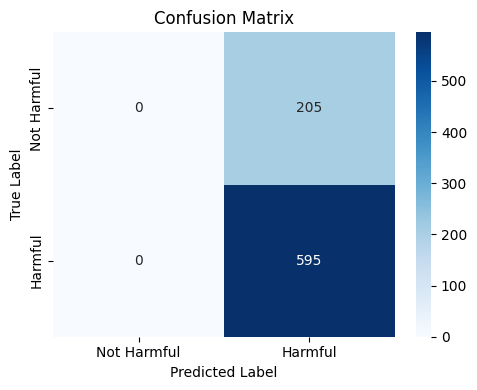

In [1]:
# Step 1: Import all necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the dataset from GitHub
dataset_url = "https://raw.githubusercontent.com/dineshnaiduavula/MOUnderUncertainity_AssignmentCW2/main/TBO_4k_train%20(1).xlsx"
dataframe = pd.read_excel(dataset_url)

# Step 3: Create a new column indicating whether any of the tags are harmful
harmful_tags = [col for col in dataframe.columns if "Harmful" in col]
dataframe["is_harmful"] = dataframe[harmful_tags].apply(lambda row: 1 if "YES" in row.values else 0, axis=1)

# Step 4: Select only useful columns and clean the text
dataframe = dataframe[["text", "is_harmful"]].dropna()
dataframe["text"] = dataframe["text"].str.lower()
dataframe["text"] = dataframe["text"].str.replace(r"http\S+|www\S+|@\w+|[^a-zA-Z0-9\s]", "", regex=True)

# Step 5: Tokenize the text and pad the sequences
text_tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
text_tokenizer.fit_on_texts(dataframe["text"])
text_sequences = text_tokenizer.texts_to_sequences(dataframe["text"])
text_padded = pad_sequences(text_sequences, padding="post", maxlen=100)

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(text_padded, dataframe["is_harmful"], test_size=0.2, random_state=42)

# Step 7: Define the LSTM model structure
harm_detection_model = Sequential([
    Embedding(input_dim=10000, output_dim=100),
    LSTM(128),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")
])

# Step 8: Compile the model
harm_detection_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Step 9: Train the model
harm_detection_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Step 10: Make predictions on the test set
predicted_labels = (harm_detection_model.predict(X_test) > 0.5).astype("int32")

# Step 11: Evaluate the model using standard metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, zero_division=1)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

print("\nModel Performance Summary")
print("--------------------------")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)

# Step 12: Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, predicted_labels, target_names=["Not Harmful", "Harmful"], zero_division=1))

# Step 13: Plot confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Harmful", "Harmful"], yticklabels=["Not Harmful", "Harmful"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
